In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_auc_score

In [93]:
iris = pd.read_csv("/Users/RoNa/Downloads/IRIS.csv")
iris= pd.DataFrame(iris)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


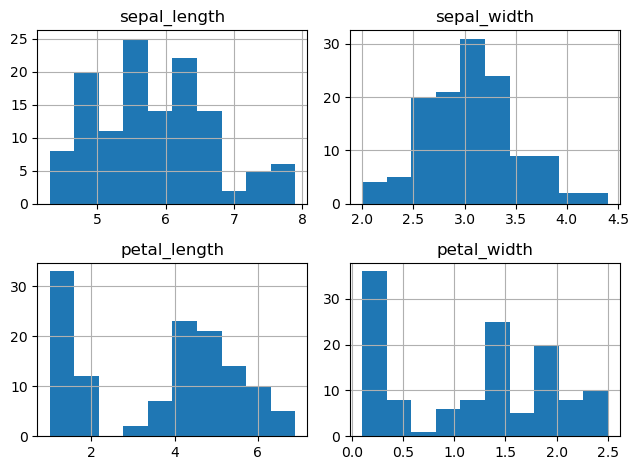

In [94]:
iris.hist()
plt.tight_layout()
plt.show()

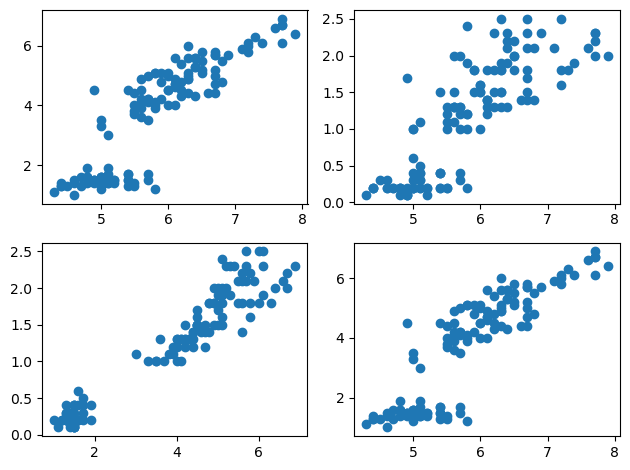

In [95]:
fig, ax = plt.subplots(2,2)
ax[0,0].scatter(iris['sepal_length'],iris['petal_length'])
ax[0,1].scatter(iris['sepal_length'],iris['petal_width'])
ax[1,0].scatter(iris['petal_length'],iris['petal_width'])
ax[1,1].scatter(iris['sepal_length'],iris['petal_length'])
plt.tight_layout()
plt.show()


<BarContainer object of 3 artists>

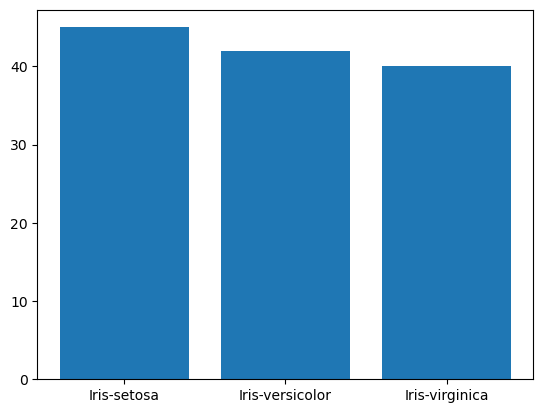

In [96]:
n = pd.Series(iris['species'])
plt.bar(n.unique(), n.value_counts())

<Axes: >

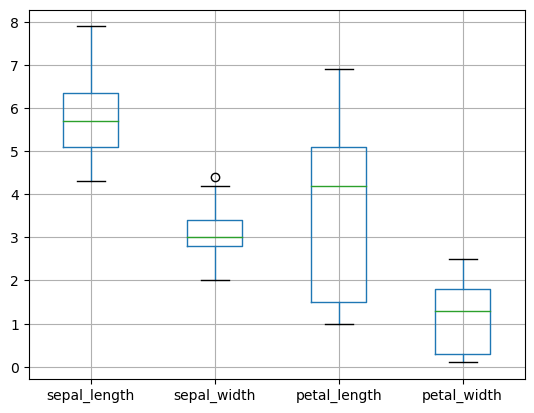

In [97]:
iris.boxplot()

In [98]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  127 non-null    float64
 1   sepal_width   127 non-null    float64
 2   petal_length  127 non-null    float64
 3   petal_width   127 non-null    float64
 4   species       127 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.1+ KB


In [99]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,127.00000,127.000000,127.000000,127.000000
mean,5.81811,3.052756,3.699213,1.164567
std,0.83594,0.448069,1.802357,0.765893
min,4.30000,2.000000,1.000000,0.100000
25%,5.10000,2.800000,1.500000,0.300000
50%,5.70000,3.000000,4.200000,1.300000
75%,6.35000,3.400000,5.100000,1.800000
max,7.90000,4.400000,6.900000,2.500000


In [100]:
iris.shape

(127, 5)

In [101]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [102]:
iris['species'].value_counts()

Iris-setosa        45
Iris-virginica     42
Iris-versicolor    40
Name: species, dtype: int64

In [103]:
le =  LabelEncoder()
iris['species'] =le.fit_transform(iris['species']) 
iris.head(50)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [104]:
iris['species'].value_counts()

0    45
2    42
1    40
Name: species, dtype: int64

In [105]:
x = iris.drop(columns = 'species' , axis = 1)
y = iris['species']
print ( x )
print ( y )

     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
122           6.7          3.0           5.2          2.3
123           6.3          2.5           5.0          1.9
124           6.5          3.0           5.2          2.0
125           6.2          3.4           5.4          2.3
126           5.9          3.0           5.1          1.8

[127 rows x 4 columns]
0      0
1      0
2      0
3      0
4      0
      ..
122    2
123    2
124    2
125    2
126    2
Name: species, Length: 127, dtype: int32


In [106]:
x_train, x_test, y_train, y_test = train_test_split(x , y, test_size=0.3, random_state=42)
print('x_train shape: ', x_train.shape)
print('x_test shape: ', x_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)

x_train shape:  (88, 4)
x_test shape:  (39, 4)
y_train shape:  (88,)
y_test shape:  (39,)


In [107]:
print (iris.std())

sepal_length    0.835940
sepal_width     0.448069
petal_length    1.802357
petal_width     0.765893
species         0.830610
dtype: float64


In [108]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
print ( x_train)
x_test = scaler.transform(x_test)
print ( x_test.std())
x_train = np.array(x_train)
x_test = np.array(x_test)

[[ 0.14725871 -1.96503754  0.09961726 -0.27926669]
 [-0.20940459 -0.99492083 -0.18135451 -0.27926669]
 [ 1.21724863  0.46025423  1.05492129  1.43837358]
 [-1.2793945   0.21772506 -1.24904724 -1.33627608]
 [-0.9227312  -1.23745001 -0.46232628 -0.14714051]
 [-0.44718013 -1.47997918 -0.0689658  -0.27926669]
 [-1.16050674  0.21772506 -1.30524159 -1.46840226]
 [-0.44718013  2.88554601 -1.36143595 -1.33627608]
 [-0.44718013 -1.47997918 -0.01277144 -0.14714051]
 [-1.04161897 -0.02480412 -1.24904724 -1.33627608]
 [-0.32829236 -0.02480412  0.15581162  0.11711184]
 [-0.80384343  0.94531259 -1.36143595 -1.33627608]
 [ 0.26614648 -0.50986247  0.09961726  0.11711184]
 [ 0.74169755 -0.02480412  0.77394952  1.04199506]
 [ 0.38503425 -1.96503754  0.38058904  0.38136419]
 [-0.5660679   2.15795847 -1.19285288 -1.07202374]
 [-0.09051682 -0.75239165  0.04342291 -0.01501434]
 [ 1.09836086 -0.02480412  0.94253258  1.17412123]
 [-0.9227312   0.94531259 -1.30524159 -1.33627608]
 [-0.32829236 -0.2673333  -0.12

In [109]:
lg = LogisticRegression(max_iter=1000)
lg.fit(x_train, y_train) 
y_pred = lg.predict(x_test)
print (y_pred)
print(lg.score(x_test,y_pred))

[0 2 1 2 0 2 1 2 2 2 1 0 0 2 0 2 0 2 0 0 0 2 1 1 0 1 2 1 0 0 0 0 0 2 2 1 0
 1 0]
1.0


In [110]:
acc = accuracy_score(y_test , y_pred)
print("Accuracy:", acc*100)

Accuracy: 87.17948717948718


In [111]:
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}
lg_cv=GridSearchCV(lg,grid,cv=10)


print("tuned hpyerparameters :(best parameters) ",lg_cv)

tuned hpyerparameters :(best parameters)  GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']})


In [112]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[17  0  0]
 [ 0  7  3]
 [ 0  2 10]]


In [113]:
# Making a predictive System 
input_data = pd.read_csv("C:/Users/RoNa/Downloads/IRIS_test_hidden.csv")
input_data = pd.DataFrame(input_data)
input_data.head()

,sepal_length,sepal_width,petal_length,petal_width
0,4.8,3.0,1.4,0.3
1,5.1,3.8,1.6,0.2
2,4.6,3.2,1.4,0.2
3,5.3,3.7,1.5,0.2
4,5.0,3.3,1.4,0.2


In [114]:
prediction = lg.predict(input_data)
print(prediction)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


C:\Users\RoNa\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [115]:
prediction = pd.DataFrame(prediction)
prediction.to_csv('prediction_Nada Abdelfatah' , index = False)

